### Barbara Karakyriakou

## Problem 1: 
### Created by: Lena

# Can we cluster text with Gaussian Mixture Models?

Check Gaussian Mixture Models @ https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html


### The problem

I have 5 text files from 5 different data sources. I found these files from the University of California, Irvine Machine Learning Repository. The source for this particular dataset is https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter This dataset was actually a bit larger - I just picked 5 sources for simplicity.

- npr.txt: set of health related tweets from npr
- msnhealth.txt: set of health related tweets from msn
- usnews.txt: set of health related tweets from usnews
- latimes.txt: set of health related tweets from latimes
- everday.txt: set of health related tweets from everdayhealth

If we try to make identify 5 clusters using Gaussian Mixture Models, will the tweets from the same sources be (mostly) together?


#### Step 1: Import the data
Make a dataframe called healthTweets that has 2 columns: the tweets (header should be "tweet"), and the text file the tweets came from (header should be "source"). <b> These files are pretty big, so use the random module to randomly select 400 tweets from each file. There is a function that will find a random sublist. </b> You should only have 2000 tweets in your dataframe 

*I skipped msnhealth.txt, therefore I will have a 1600 tweets 

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# import tweets from file 

npr = (pd.read_csv('npr.txt', names=['tweet'])).sample(n=400)
usnews = (pd.read_csv('usnews.txt', names=['tweet'])).sample(n=400)
latimes = (pd.read_csv('latimes.txt', names=['tweet'])).sample(n=400)
everyday = (pd.read_csv('everyday.txt', names=['tweet'])).sample(n=400)

In [3]:
# make dataframe! 

npr['source'] = 'npr'
usnews['source'] = 'usnews'
latimes['source'] = 'latimes'
everyday['source'] = 'everyday'

healthTweets = npr.append([usnews,latimes,everyday]).reset_index(drop=True)

len(healthTweets)

1600

#### Step 2: "Vectorizing" the text

Before we throw this to GMM, we have to prep the words. Basically we have to convert the tweets into vectors that  we can then use to make the model. In the cell below, use TfidfVectorizer to transform ONLY the tweet column of your dataframe into something that the GaussianMixture module can work with. Here's some documentation, but I will tell you that you can (and should) do this part in 2 lines. 
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [4]:
vector = TfidfVectorizer(max_df = 0.50)
X = vector.fit_transform(healthTweets.tweet)

#### Step 3: Make the model!
Use the GaussianMixture module to to make a model, and then create labels for the tweets using (predict()). I know that in the book they used GMM, but that has been deprecated. So far it seems that all the functions in the book work the same in GaussianMixture as they did in GMM. 
<b> You will most likely get an error the first time you run this, but don't worry, the error tells you EXACTLY what to do to fix it. </b>
<br>Make sure you print out the counts of the different labels so you can get a first glance on how your model did. This took almost 2 minutes for my computer to run - so don't worry if it takes longer than a few seconds. 

In [5]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X.toarray())

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
import collections
labels = gmm.predict(X.toarray())
collections.Counter(labels), len(labels)

(Counter({1: 808, 2: 68, 3: 502, 0: 222}), 1600)

#### Step 4: Attaching new labels and exploring the data
So, you got a perfect clean 400 for each label, right? 
<br>No, unfortunately not.
<br>So, what gives? Is clustering text not really something we can do?

Add a new column to the dataframe called "label". You should have it equal to the labels that you created in the model.

In [7]:
healthTweets['label'] = labels
healthTweets.head()

,tweet,source,label
0,Paleo For Dogs? Vets Say Trendy Diet Could Mak...,npr,1
1,Texas Health Care Worker Tests Positive For Ebola,npr,2
2,In West Africa,npr,1
3,Powerful Narcotic Painkiller Up For FDA Approval,npr,1
4,Meanstruation: HelloFlo's Mother-Daughter War ...,npr,1


Display dataframes based on each value of the label column. Since the tweets were randomly selected above, I won't ask you to throughoughly describe each set, but you should seriously take a look. Are any of the tweets with a particular label overwhelmingly from the same source? Do they have some similar language? Perhaps one group is talking about food and another is talking about the flu? You don't have to write a response, but do display each subset of the dataframe based on teh value of the label (or however much the notebook will allow you to output). 

In [8]:
zero = healthTweets.loc[healthTweets['label'] == 0]
collections.Counter(zero.source)

Counter({'npr': 7, 'usnews': 102, 'latimes': 34, 'everyday': 79})

In [9]:
one = healthTweets.loc[healthTweets['label'] == 1]
collections.Counter(one.source)

Counter({'npr': 254, 'usnews': 141, 'latimes': 248, 'everyday': 165})

In [10]:
two = healthTweets.loc[healthTweets['label'] == 2]
collections.Counter(two.source)

Counter({'npr': 29, 'usnews': 11, 'latimes': 9, 'everyday': 19})

In [11]:
three = healthTweets.loc[healthTweets['label'] == 3]
collections.Counter(three.source)

Counter({'npr': 110, 'usnews': 146, 'latimes': 109, 'everyday': 137})

So no, our model did not cluster the tweets by source. It could be that the data isn't totally cleaned up, or it could just be that there isn't any particular language that sets one source's tweets apart from the others. I personally ran this more than a few times, and I did notice some interesting clusters. I found that the model actually did a decent job clustering the tweets by content: I had clusters of exercise related tweets, food related tweets, tweets that were mostly retweets and mentions, and I even had a cluster that sounded overwhelmingly like click-bait.

** Running the code few times I noticed clusters of tweets with common features, such as Obamacare, drug related, dietary and nutrition related, allergy and disease related. I also tried to vectorize with the stop_word parameter using the ENGLISH_STOP_WORDS set, and it created a big cluster of about 1250 tweets, since at that point all were health related after all the common words were excluded.

## Problem 2: 
### Created by: Phil

# Clustering Survey Results

A large midwestern university recently administered a survey to students in its various academic departments, to collect opinions about the effectiveness of faculty and staff in several areas. The results are summarized in the student_survey.csv file as percentages of positive responses to questions in the following areas:
* Overall Rating -- the student's overall satisfaction with his or her department
* Staff Responsiveness -- how well faculty and staff respond to questions and to issues raised by students
* Fairness in Class -- the degree to which faculty and staff treat students fairly (avoiding favoritism, etc.)
* Learning Opportunities -- the variety and quality of different teaching techniques and resources used
* Fairness in Grading -- how well student grades reflect effort and accomplishment
* Employment Opportunities -- the variety and quality of opportunities for internships and other employment

For example, a value of 63 for "Fairness in Grading" indicates that 63% of responses from students in the given department were positive with respect to this category.

The purpose of this exercise is to analyze the survey results to determine whether the various departments tend to cluster with regard to their responses in some of these categories. The names of the departments have been masked by replacing them with generic names.

Download the student_survey.csv file from Canvas.

Start with the usual imports; read the dataset in and display the first few lines. Note that this dataset is fairly straightforward and has no missing responses or other data cleaning issues.

In [12]:
import pandas as pd
import numpy as np

ss = pd.read_csv('student_survey.csv')
ss.head()

,Department,Overall Rating,Staff Responsiveness,Fairness in Class,Learning Opportunities,Fairness in Grading,Employment Opportunities
0,Dept_1,43,51,30,39,61,45
1,Dept_2,63,64,51,54,63,47
2,Dept_3,71,70,68,69,76,48
3,Dept_4,61,63,45,47,54,35
4,Dept_5,81,78,56,66,71,47


Separate the dataset into a Series called 'dept' containing the department names (the first column of the dataset) and a DataFrame called 'responses' containing the data from the remaining columns.

In [13]:
dept = pd.Series(ss.iloc[1,:])
dept.head()

Department                Dept_2
Overall Rating                63
Staff Responsiveness          64
Fairness in Class             51
Learning Opportunities        54
Name: 1, dtype: object

In [14]:
responses = pd.DataFrame(ss.iloc[:,1:])
responses.columns

Index(['Overall Rating', 'Staff Responsiveness', 'Fairness in Class',
       'Learning Opportunities', 'Fairness in Grading',
       'Employment Opportunities'],
      dtype='object')

Using KMeans clustering with cluster counts from 1 to 15, plot the total error cost of each KMeans model against its cluster count. The goal here is to visually locate an "elbow" in the graph that indicates an optimal number of clusters. (Hint: you can use scipy's cdist function to sum up the euclidean distance of each responses data point to each of the cluster centers. You will need to create a separate KMeans model for each cluster count.)

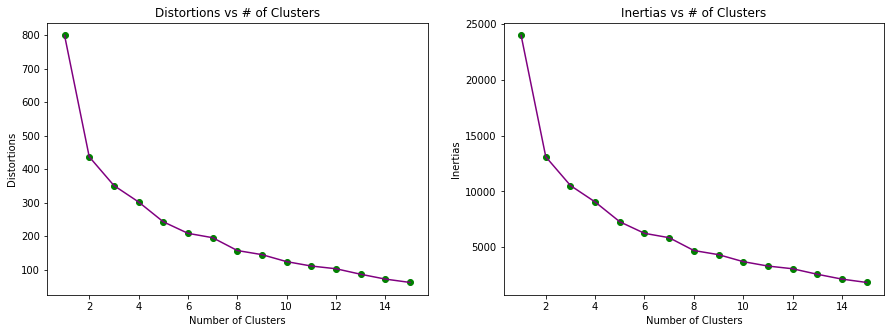

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#plt.plot()

n_clust = range(1,16)

#list comprehension to get the kmeans list of each cluster count
kmeans = [KMeans(n_clusters=i).fit(responses, dept) for i in n_clust] 
#list comprehension to get the list of centroids for each kmeans
centroids = [kmeans[i].cluster_centers_ for i in range(0,len(kmeans))] 

#loop to calculate the distortions for each cluster count
distortions = []
for i in range(0,len(kmeans)):
    distortions.append(sum(np.min(cdist(responses, centroids[i], 'sqeuclidean'), axis=1)) \
                       / responses.shape[0])

# list comprehension to get the list of inertias for each cluster count   
inertias =  [kmeans[i].inertia_ for i in range(0,len(kmeans))]

# plot side by side the cluster counts against the distortions and against the inertias 
# to visualize the "elbow" graph and locate the nubler of cluster were the inflection is rather sharp 

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(n_clust,distortions, color = "green")
plt.plot(n_clust, distortions, color = "purple")
# plot Labels
plt.title("Distortions vs # of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")


plt.subplot(1,2,2)
plt.scatter(n_clust,inertias, color = "green")
plt.plot(n_clust, inertias, color = "purple")
# plot Labels
plt.title("Inertias vs # of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias") 

plt.show()

You should have seen a relatively sharp inflection in the graph at 2 clusters. To visually confirm this, generate a set of graphs of each the KMeans(n_clusters=2) predictions for each response category against each other category.  You should be able to do this with a for loop that produces a scatter plot showing each department's response in one category on the X-axis and the other category on the Y-axis, with a different color for each of the two predicted clusters. Assuming you don't plot each category against itself, you should end up with 15 graphs showing relatively clear clustering.

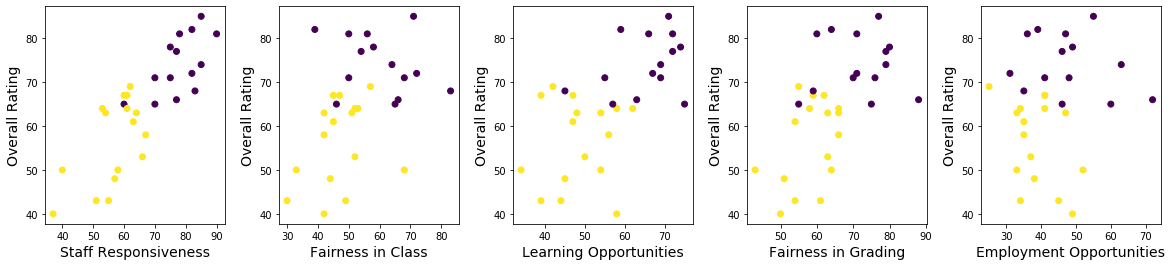

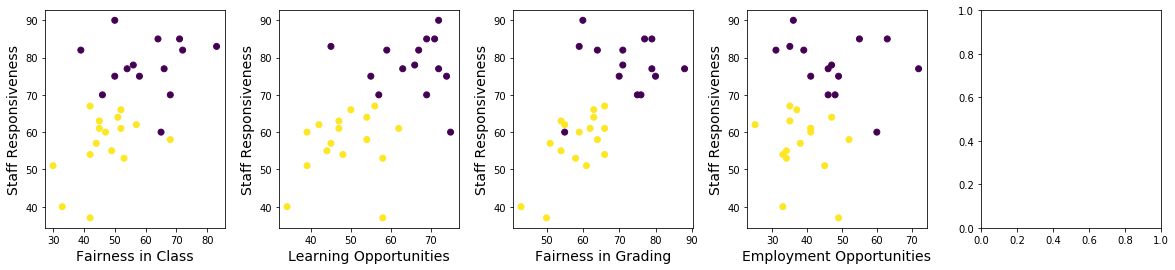

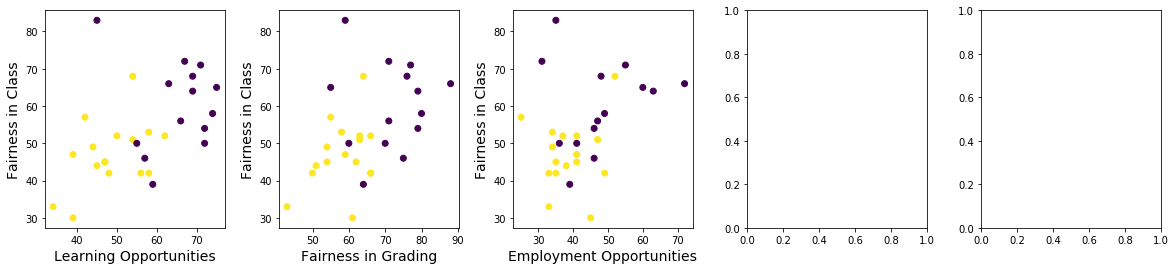

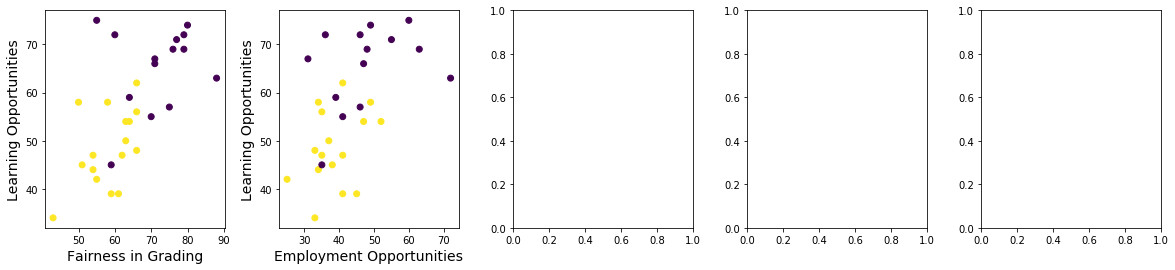

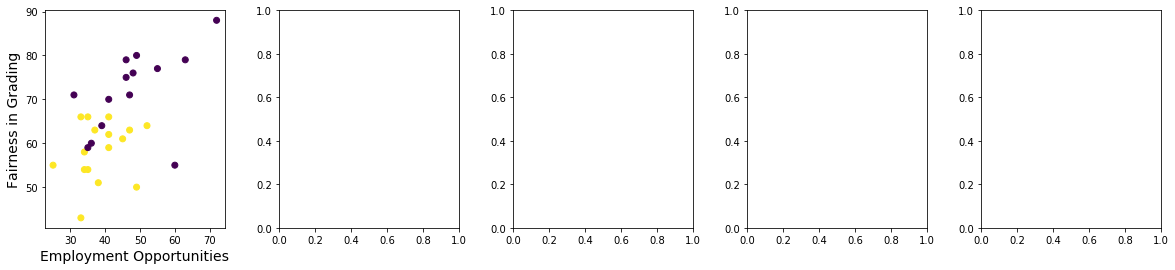

In [17]:
kmeans2 = KMeans(n_clusters=2)
labels = kmeans2.fit_predict(responses)

# loop over a range equal to the length of the columns
for j in range(0,5):
    # create a figure with subplots of 5 columns and one row each time
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    # adjust the space between the subplots
    plt.subplots_adjust(wspace = 0.3)
    #loop over the each column 
    for i, col_name in enumerate(responses.columns[(j+1):]):
        # plot a scatter graph looping over each column for x-axis and starting with the first column on y-axis
        # label the clusters with the predictions
        ax[i].scatter(responses[col_name], responses.iloc[:,j], c=labels)
        # create the x-axis labels by each of the column titles
        ax[i].set_xlabel(col_name, fontsize = 14 )
        # create the y-axis label by the column title in iteration
        ax[i].set_ylabel(responses.columns[j], fontsize = 14)


## Problem 3: 
### Created by: Kaleigh

# Fertility Classification with Perceptron Model


Source: https://archive.ics.uci.edu/ml/datasets/Fertility#

In this problem, we are exploring data from the UCI Machine Learning Repository Fertility Data Set.  This dataset contains personal information related to socio-demographic, environmental, lifestyle and health factors for 100 men.  Each man is also labeled with a fertility diagnosis, which is what we will be using as the label in our classification model. 

The goal is to create a model to classify a man's fertility as 'normal' or 'altered'.

Note: Feel free to download the data directly from the UCI website at the link above or use the csv file provided on canvas.  The file has not been altered aside from the addition of a header.

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fc = pd.read_csv('fertility.csv')
fc.head()

,Season,Age,Childish_Diseases,Trauma,Surgery,Fevers,Alcohol_Frequency,Smoking_Frequency,Time_Sitting,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


### Part 1: Implement the single-layer perceptron model
Implement the scikit-learn Perceptron Model on the fertility dataset described above. **Display the confusion matrix and classification report.** 

In [19]:
# separate the data and apply the model

X = fc.drop('Diagnosis',axis=1)
y = fc['Diagnosis']

model = Perceptron(max_iter=100)
model.fit(X,y) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

[[85  3]
 [10  2]]


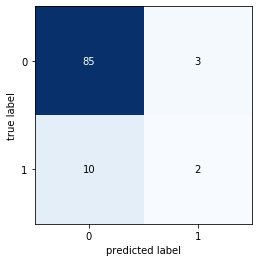

In [20]:
# make predictions and plot the confusion matrix

predictions = model.predict(X)

cfm = confusion_matrix(y,predictions)

print(cfm)

fig, ax = plot_confusion_matrix(conf_mat=cfm)
plt.show()

In [21]:
# print the classification report

creport = classification_report(y, predictions)

print(creport)

              precision    recall  f1-score   support

           N       0.89      0.97      0.93        88
           O       0.40      0.17      0.24        12

    accuracy                           0.87       100
   macro avg       0.65      0.57      0.58       100
weighted avg       0.84      0.87      0.85       100



In [22]:
# print the accuracy score

accuracy = accuracy_score(y, predictions) * 100

print('Accuracy of Perceptron classifier {}'.format(accuracy))

Accuracy of Perceptron classifier 87.0


### Part 1.2: Analyze your perceptron model
Answer each of the following questions  (in a couple of sentences):  
- What did you learn from the accuracy score, confusion matrix, and classification report?  
- Which specific hyperparameters did you try tuning in order to improve the accuracy of each model? What was the result of each of these changes (and why)?  

**The accuracy score tells us that the model label predictions were 89% accurate (for both labels combined).  Looking in the confusuion matrix, there are 87 true negatives, 2 true positives, 1 false positive, and 10 false negatives. By the clasificasion report, we see that the model predicts true negatives 99% of the time, but true positives only 17% of the time. Therefore on average the f1 score is 86%, which is lower than the accuracy score. 
Increasing the number of epochs (max_iter) on the classifier resulted in better scores.

### Part 2: Implement a second classifier of your choice
Train/test a different classification model (of your choice) on the same fertility dataset used above.  **Display the confusion matrix and classification report.**


In [23]:
from sklearn.neighbors import KNeighborsClassifier

X1 = fc.drop('Diagnosis',axis=1)
y1 = fc['Diagnosis']

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X1, y1)

print('Accuracy of K-NN classifier {}'.format(knn.score(X1, y1)))

Accuracy of K-NN classifier 0.91


[[88  0]
 [ 9  3]]


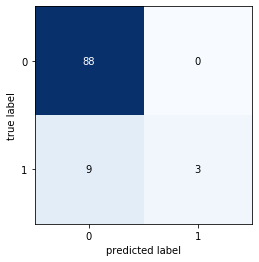

In [24]:
predictions1 = knn.predict(X1)

cfm1 = confusion_matrix(y1, predictions1)

print(cfm1)

fig, ax = plot_confusion_matrix(conf_mat=cfm1)
plt.show()

In [25]:
creport1 = classification_report(y1, predictions1)

print(creport1)

              precision    recall  f1-score   support

           N       0.91      1.00      0.95        88
           O       1.00      0.25      0.40        12

    accuracy                           0.91       100
   macro avg       0.95      0.62      0.68       100
weighted avg       0.92      0.91      0.89       100



### Part 2.2: Analyze your second model
Answer each of the following questions (in a couple of sentences):  
- What did you learn from the accuracy score, confusion matrix, and classification report?  
- Which specific hyperparameters did you try tuning in order to improve the accuracy of each model? What was the result of each of these changes (and why)?  

> 1. The accuracy score tells us that the model label predictions were 91% accurate (for both labels combined).  Looking in the confusuion matrix, there are 88 true negatives, 3 true positives, 0 false positive, and 9 false negatives. By the fthe clasificasion report, we see that the model predicts true negatives 100% of the time, and true positives 25% of the time. On average the f1 score is 89%, which is 2% lower than the accuracy score. 
> 2. The best accuracy score was achieved with number of neighbors equal to 2 or 3. Increasing the number of neighbors resulted in less accuracy.

### Part 3: Compare  your models
Answer each of the following questions (~1 sentence per question):
- Which model performed better?
- In an ideal world, how would you create a better classifier for this dataset?

**The KNN classifier permormed slightly better, but after trying different numbers of neighbors. This particualr dataset has very few data points of positive results, so the KNN model with low number of neighbors seems to work better here. Ideally, the 1NN model would probably suit best.

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X1, y1)

print('Accuracy of 1-NN classifier {}'.format(knn.score(X, y)))

Accuracy of 1-NN classifier 0.99


**Indeed, 1-NN scores 99% accuracy!

## Problem 4: 
### Created by: Joe

# Behold!

![picture](https://neuromuscular.wustl.edu/pics/biopsy/inflammation/BCIM/bcim-09-07-21-14hepvcells.jpg)

# Biology meets unsupervised learning.

You're a biologist for a day (if you're not already a biologist), and you've been tasked with the tedious chore of counting the dark splotches in this picture.

You're not at all interested in counting these dots by hands.  What do you do?  You decided you'll use some of your unsupervised learning techniques, a maybe some supervised learning techniques and a bit of ingenuity, to estimate the number of dark purple splotches in this picture.

Requirements:

- Use an unsupervised learning technique like PCA or Kmeans.
- Give a reasonable estimate on the number of dark purple dots.

'Hints:

- Consider lumping the colors in the picture into categories and count the pixel classification(s) that correspond to the desired darker purple colors.

- Classifying your picture may work better using all three RGB values, or it may work better using just one or two of the RGB values.

- If you want, you can engineer new color values from the existing color values.

- A coarse tool for calculating the number of splotches uses the fact that a typical splotch (in our picture) is of size 29 pixels.

In [27]:
# suggested libraries

import os
import numpy as np
import sklearn
import scipy
import urllib
from sklearn.cluster import KMeans
#from scipy.misc import toimage -depreciated 
from PIL import Image
import matplotlib.pyplot as plt

First things first, you need to load the picture into a numpy array:

In [28]:
# This cell will download the picture and save it to your 
# working directory.  No need to download the file from Canvas.

# the url of our picture
pic_url = 'https://neuromuscular.wustl.edu/pics/biopsy/inflammation/BCIM/bcim-09-07-21-14hepvcells.jpg'

# creating a file to store the picture
with open("pic.jpg","wb") as f:

    # writing to file, the data we get from the Internet
    f.write(urllib.request.urlopen(pic_url).read())

In [29]:
# The above code should have downloaded the image and saved
# it to your current working directory. Load that image date into a numpy array:

# YOUR CODE HERE

im = Image.open('pic.jpg', 'r')
width, height = im.size
im_array = np.array(im)
im_array.shape, im.size , im_array[0,5,:] # get info on how the data look like

((575, 800, 3), (800, 575), array([210, 198, 212], dtype=uint8))

From here, you're largely on your own.  We've loaded several pictures into numpy arrays over the semester.  You'll probably want to extract the size of the data and keep the x and y limits around.  Whatever classifier you use, you'll probably want to take your data/picture out of the array format so you can input it to a classifier.  I'd suggest using a Kmeans classifier on pixel colors, but other things can work.  If you go the K mean route, remember that you can choose one color or all colors or even alter the colors as would work for you.  Histograms of the different color frequencies may help.  Ignoring colors above or below a certain range may help.  You've come a long way this semester.  Now's your chance to explore.

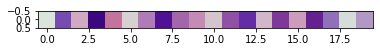

In [30]:
# Your code here:

# I will use the KMeans classifier to create clusters of colors
# Reshape the image array for the classifier
X = im_array.reshape(575 * 800, 3)

# start with 20 clusters of colors and display them
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)

color = np.array([kmeans.cluster_centers_[:]],dtype=np.uint8)
plt.imshow(color)

[[[204 167 193]
  [ 89  30 146]
  [215 216 214]
  [158 100 173]]] [0 1 2 3]


(None, <matplotlib.image.AxesImage at 0x1a1a80e910>)

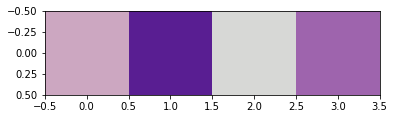

In [31]:
# It appears that we have at list 5 similar colors that we can group together
# Will try with 4 clusters

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

color = np.array([kmeans.cluster_centers_[:]],dtype=np.uint8)
labels = kmeans.labels_
print(color, np.unique(labels)), plt.imshow(color)

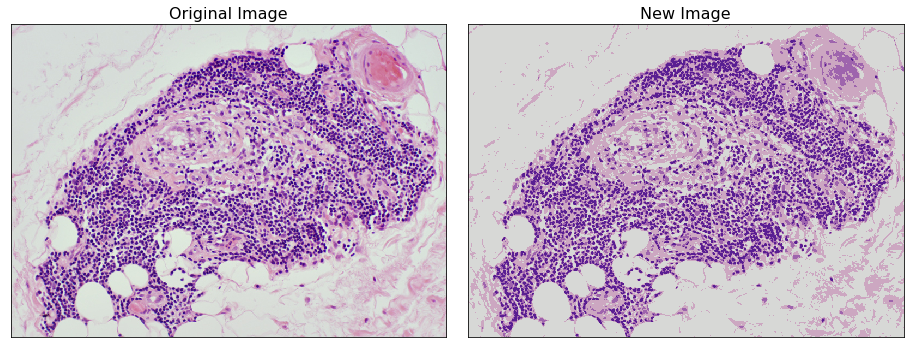

In [32]:
# Display the image with 4 colors
new_colors = np.array(kmeans.cluster_centers_[kmeans.predict(X)], dtype=np.uint8)
new_image = new_colors.reshape(575,800,3)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im_array)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_image)
ax[1].set_title('New Image', size=16);

**It looks very similar, almost identical in terms of the purple spots. We can now calculate the number of pixels that represent the purple color in the list of the four cluster centers ([ 89  30 146]).


In [33]:
# We will print the unique labels to get the instances of each triplet.
# We will also print the unique new colors to get the instances of each of the R,G,B values.

labels = kmeans.predict(X)
np.unique(labels, return_counts=True), np.unique(new_colors, return_counts=True)

((array([0, 1, 2, 3], dtype=int32), array([125462,  48310, 231294,  54934])),
 (array([ 30,  89, 100, 146, 158, 167, 173, 193, 204, 214, 215, 216],
        dtype=uint8),
  array([ 48310,  48310,  54934,  48310,  54934, 125462,  54934, 125462,
         125462, 231294, 231294, 231294])))

**We are interested in label 1 that is for the centroid of the dark purple color. The rgb triplet for that color is (89,30,146), and the number of unique label counts for it is 48310. We can reconfirm this number by the color array looking for the unique counts of the r,g,b values of 89, 30, & 146 respectively. We can see that there is a unique count of 48310 for each one of these, and there is no overlapping of these values in any of the triplets that make the other three colors. Therefore, we can confidently estimate the number of pixels for the dark purple color to 48310.

In [34]:
# total number of purple pixels divided by 29 pixels per splotch gives how many purple splotches?
count = np.unique(labels, return_counts=True)[1][1]
print('The number of purple splotches is approximately {}'.format((round(count/29))))

The number of purple splotches is approximately 1666.0
